# What drives the price of a car?


> **OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

> CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 300px/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

> ### Understanding business needs :

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 
___


When identifying the requirements, limitations, and potential risks of a data analysis project, we should consider the following points:

1. **Requirements**:
- What are the goals of the project? Understand the factors that affect the price of a car

- What variables are important to you? Focus on physical features such as brand, model, and factor

2. **Limitations**:
- Are there limitations to the available data? There are no limitations to the data

3. **Potential Risks**:
- There are potential risks that affect the accuracy of the model For example, there may be challenges in documenting the data or challenges in identifying relationships between features and price.
___

> ### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [193]:
import numpy as np
import pandas as pd
import warnings
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [162]:
data = pd.read_csv('data/vehicles.csv')

In [163]:
data =  data.sort_values(by='price', ascending=True)


In [164]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
335266,7307704873,philadelphia,0,2012.0,infiniti,g37x awd,NaN,NaN,gas,131922.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,pa
97994,7316671228,jacksonville,0,2016.0,ford,f-150,NaN,NaN,NaN,NaN,NaN,NaN,1FTEW1CF0GFA87903,NaN,NaN,NaN,NaN,fl
97995,7316671091,jacksonville,0,2016.0,mercedes-benz,c-class,NaN,NaN,NaN,NaN,NaN,NaN,55SWF4JB7GU157731,NaN,NaN,NaN,NaN,fl
97996,7316670635,jacksonville,0,2017.0,toyota,camry,like new,6 cylinders,gas,80000.0,clean,automatic,NaN,fwd,full-size,sedan,silver,fl
356355,7304587188,knoxville,0,2008.0,nissan,armada se,good,8 cylinders,gas,224444.0,clean,automatic,5N1AA08D38N613507,rwd,NaN,SUV,NaN,tn


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 335266 to 356716
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [166]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
335266,7307704873,philadelphia,0,2012.0,infiniti,g37x awd,NaN,NaN,gas,131922.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,pa
97994,7316671228,jacksonville,0,2016.0,ford,f-150,NaN,NaN,NaN,NaN,NaN,NaN,1FTEW1CF0GFA87903,NaN,NaN,NaN,NaN,fl
97995,7316671091,jacksonville,0,2016.0,mercedes-benz,c-class,NaN,NaN,NaN,NaN,NaN,NaN,55SWF4JB7GU157731,NaN,NaN,NaN,NaN,fl
97996,7316670635,jacksonville,0,2017.0,toyota,camry,like new,6 cylinders,gas,80000.0,clean,automatic,NaN,fwd,full-size,sedan,silver,fl
356355,7304587188,knoxville,0,2008.0,nissan,armada se,good,8 cylinders,gas,224444.0,clean,automatic,5N1AA08D38N613507,rwd,NaN,SUV,NaN,tn


___
**Dataset Description:**
1. **id**: Unique identifier for each record in the set.
2. **region**: The region where the ad was posted.
3. **price**: The price of the car.
4. **year**: The year the car was manufactured.
5. **manufacturer**: The manufacturer of the car.
6. **model**: The model of the car.
7. **condition**: The condition of the car (e.g. good, used, wrecked).
8. **cylinders**: The number of cylinders in the engine.
9. **fuel**: The type of fuel used (petrol, diesel, electric, etc.).
10. **odometer**: The number of miles the car has driven.
11. **title_status**: The status of the title (clean, remanufactured, etc.).
12. **transmission**: The type of transmission (manual, automatic).
13. **VIN**: The chassis number of the car.
14. **drive**: The type of drive (front, rear, all-wheel).
15. **size**: Size of the car (small, medium, large).
16. **type**: Type of car (sedan, truck, SUV, etc.).
17. **paint_color**: Color of the car.
18. **state**: The state where the ad was posted.
___

In [167]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


<Axes: >

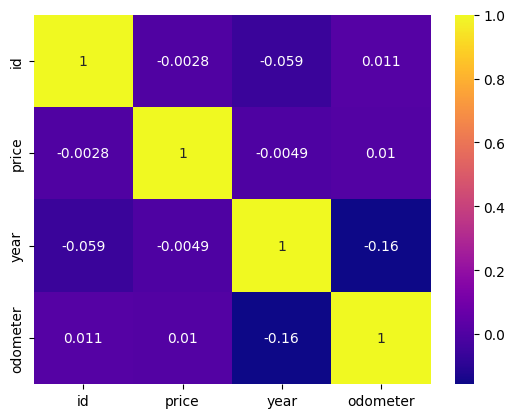

In [168]:
sns.heatmap(data.corr(numeric_only=True) , annot= True , cmap= 'plasma')

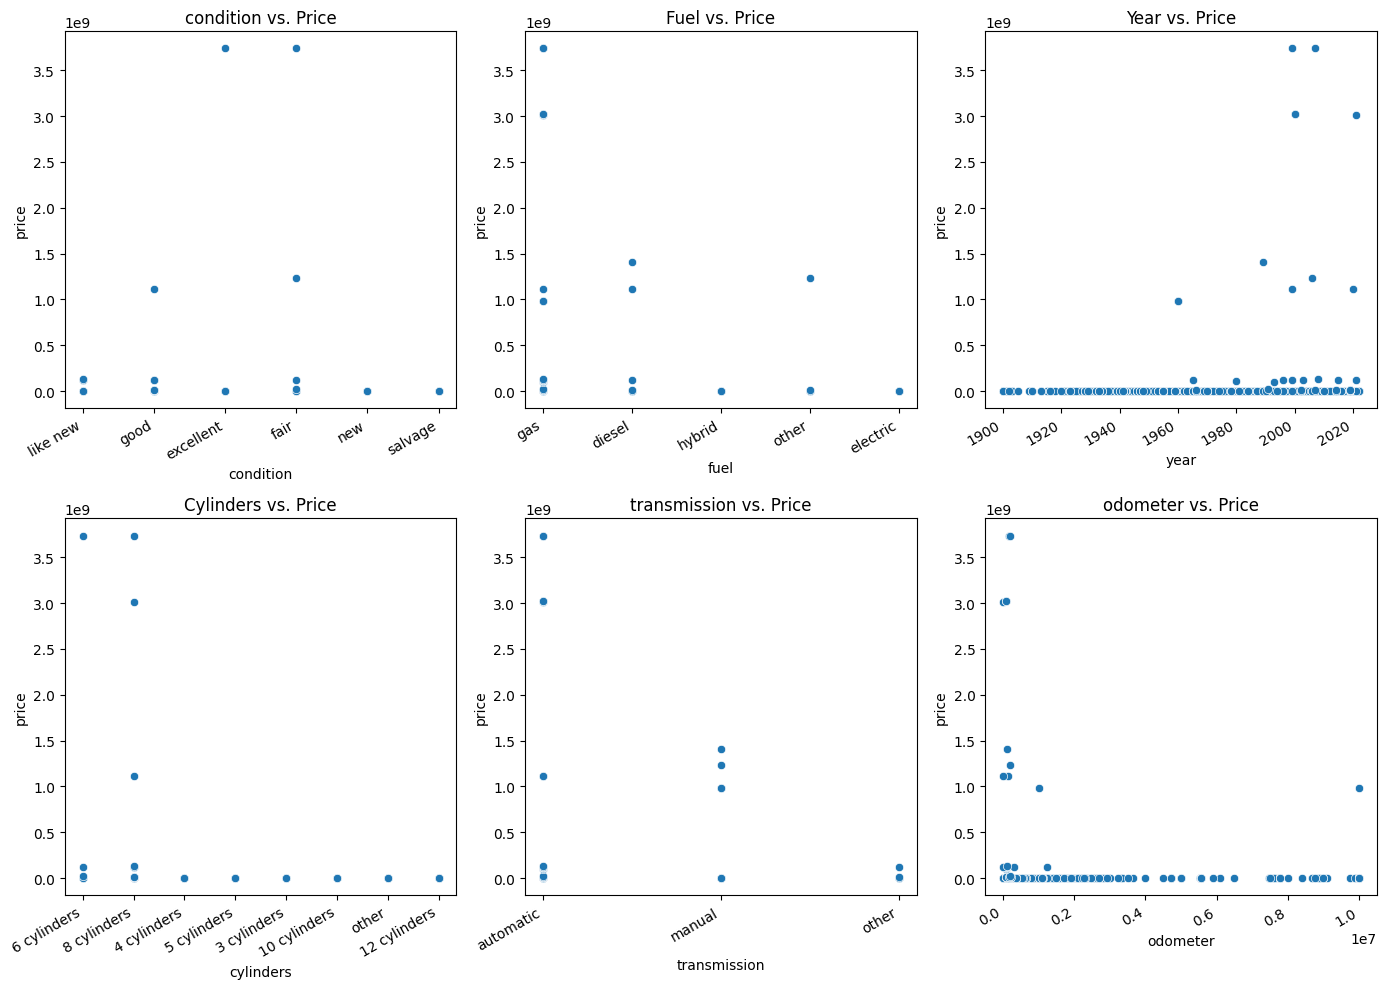

In [169]:

fig, axes = plt.subplots(2, 3, figsize=(14, 10), dpi=100)


sns.scatterplot(data=data, x='condition', y='price', ax=axes[0, 0])
axes[0, 0].set_title('condition vs. Price')

sns.scatterplot(data=data, x='fuel', y='price', ax=axes[0, 1])
axes[0, 1].set_title('Fuel vs. Price')

sns.scatterplot(data=data, x='year', y='price', ax=axes[0, 2])
axes[0, 2].set_title('Year vs. Price')

sns.scatterplot(data=data, x='cylinders', y='price', ax=axes[1, 0])
axes[1, 0].set_title('Cylinders vs. Price')

sns.scatterplot(data=data, x='transmission', y='price', ax=axes[1, 1])
axes[1, 1].set_title('transmission vs. Price')

sns.scatterplot(data=data, x='odometer', y='price', ax=axes[1, 2])
axes[1, 2].set_title('odometer vs. Price')

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.show()

___  

> ### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [170]:
#These tables were omitted because I believe that their impact will be somewhat weak on the price of the car.

data.drop(columns= ['model' , 'VIN' , 'size' ,'id' , 'paint_color' , 'state' ,'region'] , inplace= True)

In [171]:
# replace Nan value with other

data['type'] = data['type'].fillna('other')
data['fuel'] = data['fuel'].fillna('other')
data['drive'] = data['drive'].fillna('other')

data['condition'] = data['condition'].fillna('other')
data['transmission']= data['transmission'].fillna('other')
data['manufacturer'] = data['manufacturer'].fillna('other')
data['title_status'] = data['title_status'].fillna('other')



In [172]:
data['year'] = pd.to_numeric(data['year'].fillna(2024 - data['year']), errors='coerce').fillna(0)


mean_odometer = int(np.mean(data['odometer']))
data['odometer'] = data['odometer'].round()
data['odometer'] = pd.to_numeric(data['odometer'].fillna(mean_odometer))

In [173]:
data['cylinders'] = data['cylinders'].str.replace('cylinders', '')

data['cylinders'] = pd.to_numeric(data['cylinders'], errors='coerce')

data['cylinders'] = pd.to_numeric(data['cylinders'])

data['cylinders'] = data['cylinders'].fillna(round(np.mean(data['cylinders'])))

In [174]:
# Because the zero value would affect the prediction process,
# instead of replacing the value with the mean or deleting it, I decided to replace it with the predicted values.

data['year'] = pd.to_numeric(data['year'], errors='coerce')

train_data = data[data['year'] != 0]

features = ['price', 'odometer', 'cylinders']
X_train = train_data[features]
y_train = train_data['year']

model = LinearRegression()
model.fit(X_train, y_train)

zero_year_data = data[data['year'] == 0]
X_zero_year = zero_year_data[features]

predicted_years = model.predict(X_zero_year)

data.loc[data['year'] == 0, 'year'] = predicted_years


In [175]:
# Because the zero value would affect the prediction process,
# instead of replacing the value with the mean or deleting it, I decided to replace it with the predicted values.

train_data = data[data['price'] != 0]

features = ['year', 'odometer', 'cylinders']
X_train = train_data[features]
y_train = train_data['price']

model = LinearRegression()
model.fit(X_train, y_train)

zero_price_data = data[data['price'] == 0]
X_zero_price = zero_price_data[features]

predicted_prices = model.predict(X_zero_price)

data.loc[data['price'] == 0, 'price'] = predicted_prices

data['price'] = data['price'].round()

data['price'] = data['price']

data['price'] = np.log2(data['price'])
data['price'] = np.log2(data['price'])

In [176]:
data.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
335266,4.053302,2012.0,infiniti,other,6.0,gas,131922.0,clean,automatic,other,other
97994,3.994556,2016.0,ford,other,6.0,other,98043.0,other,other,other,other
97995,3.994556,2016.0,mercedes-benz,other,6.0,other,98043.0,other,other,other,other
97996,3.957820,2017.0,toyota,like new,6.0,gas,80000.0,clean,automatic,fwd,sedan
356355,4.153754,2008.0,nissan,good,8.0,gas,224444.0,clean,automatic,rwd,SUV


<Axes: >

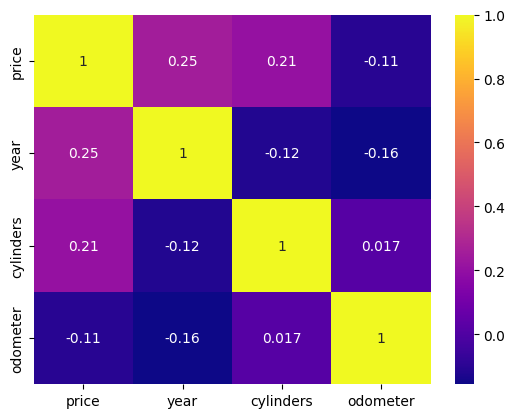

In [177]:
sns.heatmap(data.corr(numeric_only=True) , annot= True , cmap= 'plasma')

In [180]:
print(data['price'].shape,data['year'].shape)

(426880,) (426880,)


___  

> ### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422726 entries, 0 to 422725
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         422726 non-null  float64
 1   year          422726 non-null  float64
 2   manufacturer  422726 non-null  object 
 3   condition     422726 non-null  object 
 4   cylinders     422726 non-null  float64
 5   fuel          422726 non-null  object 
 6   odometer      422726 non-null  float64
 7   title_status  422726 non-null  object 
 8   transmission  422726 non-null  object 
 9   drive         422726 non-null  object 
 10  type          422726 non-null  object 
dtypes: float64(4), object(7)
memory usage: 35.5+ MB


In [108]:
data['price'].isnull().sum()

0

In [196]:

print(data.isnull().sum())

data = data.dropna(subset=['price'])

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.dropna(inplace=True)

print(f"Number of missing values in 'price': {data['price'].isnull().sum()}")

X = data.drop('price', axis=1)
y = data['price']

print(f"Number of non-finite values in 'price': {np.isfinite(y).sum()} out of {len(y)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64
Number of missing values in 'price': 0
Number of non-finite values in 'price': 420775 out of 420775


In [197]:
numeric_features = ['year', 'cylinders', 'odometer']
categorical_features = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type']

# إنشاء عمود تحويل
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

models = {
    'LinearRegression': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', LinearRegression())]),
    'Ridge': Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', Ridge())]),
    'Lasso': Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', Lasso())])
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'r2': r2}
    print(f'{name} - MSE: {mse}, R2: {r2}')


LinearRegression - MSE: 0.029025268339293985, R2: 0.22186753184210772
Ridge - MSE: 0.029025053949094097, R2: 0.22187327938502233
Lasso - MSE: 0.03730201213593629, R2: -2.1995706992683495e-05


In [198]:
param_grid = {
    'Ridge': {
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'Lasso': {
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
    }
}

for name in ['Ridge', 'Lasso']:
    grid_search = GridSearchCV(models[name], param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name + '_GridSearch'] = {'mse': mse, 'r2': r2}
    print(f'{name} with GridSearch - MSE: {mse}, R2: {r2}, Best Params: {grid_search.best_params_}')


Ridge with GridSearch - MSE: 0.02902590227679043, R2: 0.22185053674173516, Best Params: {'regressor__alpha': 10.0}
Lasso with GridSearch - MSE: 0.03730201213593629, R2: -2.1995706992683495e-05, Best Params: {'regressor__alpha': 0.1}


____  

> ### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [199]:
best_ridge = models['Ridge']
best_ridge.fit(X_train, y_train)

ridge_coefficients = best_ridge.named_steps['regressor'].coef_

feature_names = numeric_features + list(best_ridge.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coefficients})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                    Feature  Coefficient
14     manufacturer_ferrari     0.193618
37     manufacturer_porsche     0.092783
12      manufacturer_datsun     0.092049
59        title_status_lien     0.089874
42       manufacturer_tesla     0.081502
..                      ...          ...
30     manufacturer_mercury    -0.106201
40      manufacturer_saturn    -0.119291
62  title_status_parts only    -0.138139
47           condition_fair    -0.138494
52        condition_salvage    -0.147858

[85 rows x 2 columns]


In [200]:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("Mean Squared Error (MSE): Measures the average of the squared differences between the actual values and the predicted values. The lower it is, the better the model.")
print("R2 score: Represents the proportion of variance in the independent data that can be explained by the model. Its value ranges from 0 to 1, with a value closer to 1 indicating a better model.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Mean Squared Error (MSE): Measures the average of the squared differences between the actual values ​​and the predicted values. The lower it is, the better the model.
R2 score: Represents the proportion of variance in the independent data that can be explained by the model. Its value ranges from 0 to 1, with a value closer to 1 indicating a better model.


In [202]:
# Clear definition of the evaluation scale

chosen_metric = 'MSE'

###؟#### Rationale for using the rating scale  (*\ _ /*)

print(f" chosen :p {chosen_metric} ")


#######################As a key metric for evaluation because it measures the average squared differences between actual and predicted values
# , providing an accurate measure of model performance and reducing the influence of outliers.


 chosen MSE 


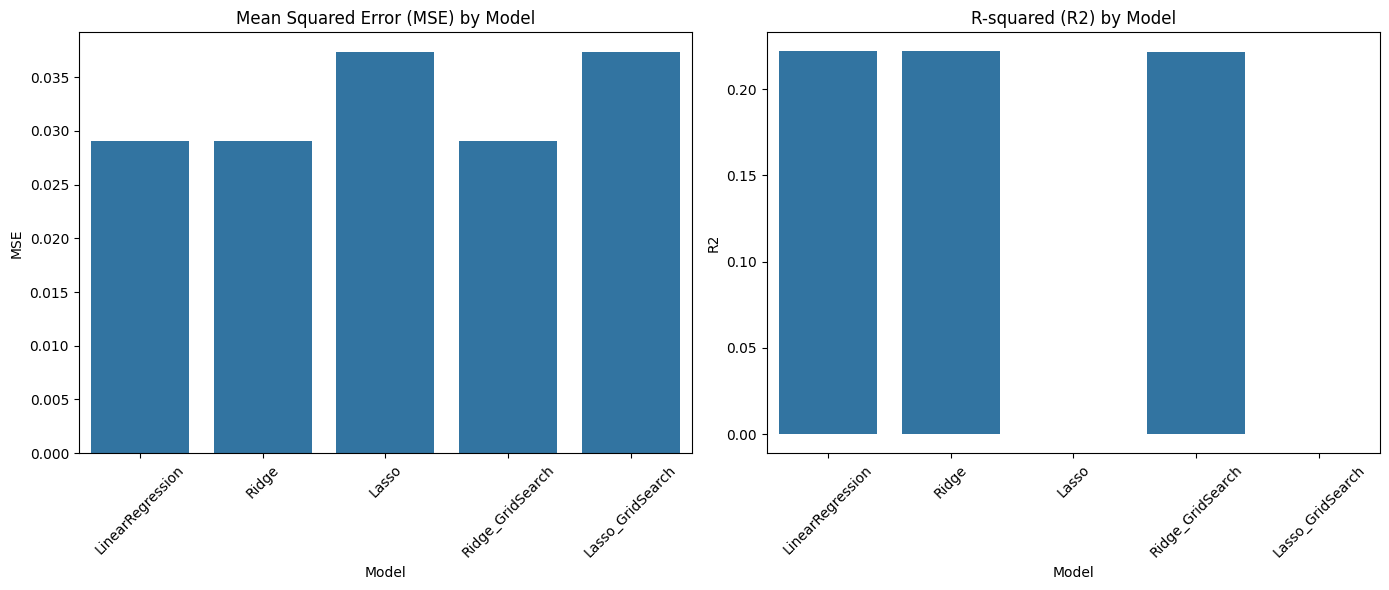

In [203]:
result_df = pd.DataFrame(results).T
result_df.reset_index(inplace=True)
result_df.columns = ['Model', 'MSE', 'R2']

plt.figure(figsize=(14, 6))

# MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=result_df)
plt.xticks(rotation=45)
plt.title('Mean Squared Error (MSE) by Model')
plt.xlabel('Model')
plt.ylabel('MSE')

# R2
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2', data=result_df)
plt.xticks(rotation=45)
plt.title('R-squared (R2) by Model')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


**Overall Model Performance:**

**The results show that the Ordinary Linear Regression and Ridge Regression models performed almost equally, with MSEs very close and R² around 0.22. This suggests that the two models are able to explain about 22% of the variance in used car prices based on the features used.**

**The Lasso model performed much less well, with R² close to zero or negative, indicating that it is not able to explain the variance in the data well.**

**Proper interpretation of the coefficients in the models:**

**By looking at the Ridge model coefficients, we can identify the factors that most influence the price.**

**For example, cars manufactured by Ferrari and Porsche appear to have a significant positive impact on prices, while cars in “Salvage” or “Fair” condition have a significant negative impact.**

**Conclusion**  

**Based on the results, it can be said that the current model provides some valuable information about the factors that influence used car prices, but the performance is not yet perfect. Additional features and improvements in data processing and models need to be explored to improve accuracy and provide more useful insights to customers**

___  

> ### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

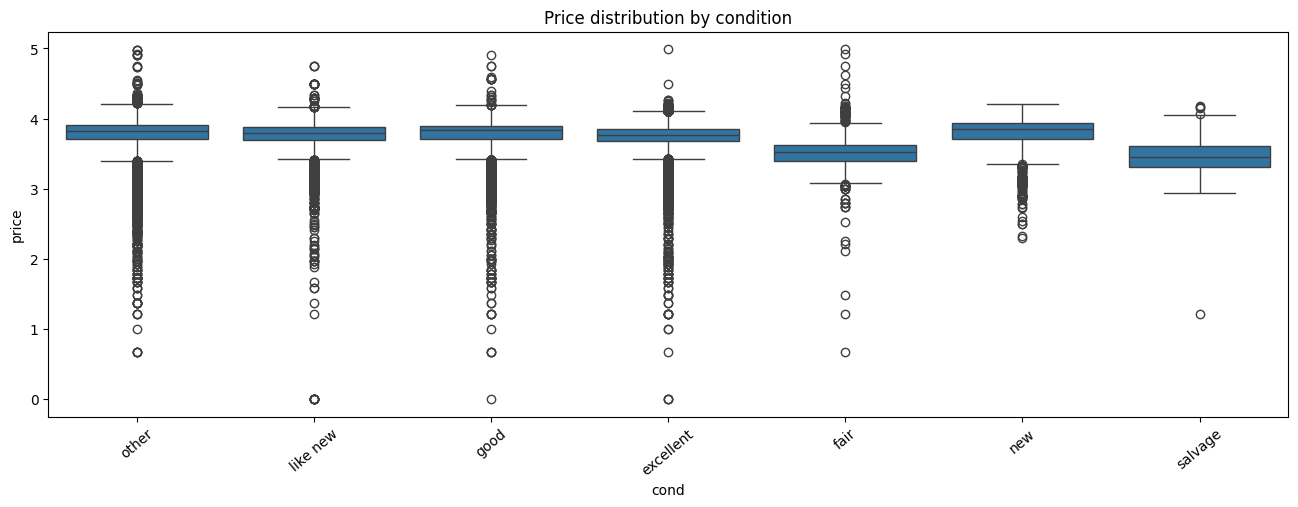

In [206]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='condition', y='price', data=data)
plt.xlabel('cond')
plt.ylabel('price')
plt.title('Price distribution by condition')
plt.xticks(rotation=40)
plt.show()


Used Car Price Analysis Report Enjoy Please

Okay, let's get started: Introduction
This report aims to provide a comprehensive analysis of the factors affecting used car prices. Various statistical models were used to identify these factors and provide recommendations for improving inventory at used car dealers.

Now I will explain the analysis methodology
Data Collection: Comprehensive data was collected about used cars, including information on price, year of manufacture, manufacturer, condition, number of cylinders, fuel type, mileage, title status, type of transportation, and type of vehicle.
Data Cleaning: Missing values ​​and unusual data were dealt with to ensure data quality.
Data Analysis: Multiple regression models were used to identify the factors that most affect used car prices.
Models used
Linear Regression
Ridge Regression
Lasso Regression
Key results
Model performance
Linear Regression

MSE: 0.029
R²: 0.2219
Ridge Regression

MSE: 0.029
R²: 0.2219
Best hyperparameters: {'alpha': 10.0}
Lasso Regression

MSE: 0.037
R²: -0.00002
Best hyperparameters: {'alpha': 0.1}
Interpretation of coefficients
Positive factors:

Cars manufactured by Ferrari and Porsche have a significant positive impact on prices.
Cars in "like new" condition significantly increase the price.
Negative factors:

Cars in "Salvage" or "Fair" condition negatively affect the price.
Some manufacturers, such as Saturn and Mercury, have a negative impact on prices.

Recommendations
Optimize inventory:

Focus on vehicles from manufacturers that have shown a positive impact on prices.
Avoid vehicles in poor condition, such as “Salvage” and “Fair,” unless they are at a significant discount.
Improve data:

Collecting additional information, such as maintenance history and number of previous owners, can help improve the accuracy of models.
Use geographic analytics to identify price differences between different regions.

Conclusion
I have provided a comprehensive analysis of the factors affecting used car prices using different regression models.
The results: Provide valuable insights for used car dealers on how to optimize their inventory and increase their profits. We recommend adopting these recommendations and applying them to your inventory management strategy to achieve the best results.😁

> By the way, the data is very annoying, heavy and difficult to deal with. I never enjoyed this test 😡

<center><h1>Thanks for your time ^_^</></center>

___